# Список must know функций на данном этапе:

1) Объявлять, обучать и делать предсказание с помощью модели (fit, predict, predict_proba)

2) Разбивать выборку на трейн и тест: train_test_split

3) Проверять качество модели на кросс-валидации: cross_val_score

4) Подбирать гиперпараметры модели по кросс-валидации: GridSearchCV

5) Уметь делать пайплайны (Pipeline) + подбирать гиперпараметры моделей из пайплайна по кросс-валидации (GridSearchCV).

# Больше практики.

In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### Попытаемся ответить на вопрос, что делать, если качество модели нас не устраивает?

Есть несколько путей решения:

a) добавить признаков

б) добавить данных

в) усложнить/упростить/поменять модель

Изначально не очевидно, какой (или какие) подходы позволят улучшить качество модели.

Посмотрим на пример. Будем работать с данными по оттоку клиентов телеком-оператора.

In [2]:
data = pd.read_csv('telecom_churn.csv').drop('State', axis=1)
data.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Преобразуйте колонку International plan таким образом, чтобы вместо Yes в ней стояла 1, а вместо No - 0.

Аналогичным образом преобразуйте колонку Voice mail plan.

Затем преобразуйте значения колонки Churn (целевой столбец) в 1 (если True) и 0 (если False).

In [3]:
data['International plan'] = data['International plan'].map({'Yes' : 1, 'No' : 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes' : 1, 'No' : 0})

data['Churn'] = data['Churn'].astype(int)

In [4]:
data.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак из таблицы data и целевой вектор (data['Churn']), затем выкиньте из матрицы вектор 'Churn'.

In [5]:
#your code here
X = data.drop('Churn', axis=1)

y = data['Churn']

In [6]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

Перед применением линейной модели **необходимо масштабировать признаки**. Создадим пайплайн, в котором сначала происходит масштабирование, а затем применяется модель. В данном случае будем использовать логистическую регрессию.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logit_pipe = Pipeline([('scaler', StandardScaler()), \
                       ('logit', LogisticRegression(class_weight='balanced'))])

Обучите модель (logit_pipe) по кросс-валидации и выведите на экран roc-auc (используйте функцию cross_val_score).

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(logit_pipe, X, y, cv=3, scoring='roc_auc').mean()

C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\pipeline.py:401: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were a

0.8171014492753623

In [12]:
import sklearn

sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

Как правило, подбор гиперпараметров алгоритма улучшает его качество. Подберём значение параметра регуляризации C в логистической регрессии по кросс-валидации, используя GridSearchCV.

In [ ]:
# model = LogisticRegression()

# param = {'C': [0.1, 1, 10, 100]}

In [18]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {'logit__C': np.logspace(-2, 1, 20)}

grid_logit = GridSearchCV(logit_pipe, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_logit.fit(X, y)

Wall time: 430 ms


C:\Users\elena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\elena\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


In [19]:
grid_logit.best_params_, grid_logit.best_score_

({'logit__C': 0.18329807108324356}, 0.8173019505284951)

$1, x_1, x_2$

Добавим квадратичные признаки: $1, x_1, x_2, x_1^2, x_2^2, x_1x_2$

Добавим признаки степени три: $1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_2^3, x_1^2x_2, x_1x_2^2$

Попробуем улучшить модель путём добавления новых признаков. **Добавьте в модель все квадратичные признаки, используя функцию PolynomialFeatures**.

Тогда происходит три действия: масштабирование, добавление признаков и применение модели. Объедините их в один пайплайн.

In [51]:
from sklearn.svm import SVC

logit_pipe2 = Pipeline([('features', PolynomialFeatures(degree=2)), \
                       ('scaler', StandardScaler()), \
                       ('logit', SVC(class_weight='balanced', kernel='linear'))])

Подберите значение параметра C по кросс-валидации

In [52]:
%%time

param_grid = {'logit__C': np.logspace(-2, 1, 20)}

grid_logit2 = GridSearchCV(logit_pipe2, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_logit2.fit(X, y)

Wall time: 1min 7s


In [53]:
grid_logit2.best_params_, grid_logit2.best_score_

({'logit__C': 0.08858667904100823}, 0.8901253132832081)

### Комментарии

1. Ошибка на обучающей выборке сама по себе ничего не говорит о качестве модели

2. Кросс-валидационная ошибка показывает, насколько хорошо модель подстраивается под данные (имеющийся тренд в данных), сохраняя при этом способность обобщения на новые данные

3. В данной задаче качество модели улучшилось при добавлении квадратичных признаков.

### Применим метод K ближайших соседей для решения задачи.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

cross_val_score(knn_model, X, y, cv=3, scoring='roc_auc').mean()

0.6625247902364607

In [28]:
?KNeighborsClassifier

Подберите число соседей n_neighbors в методе с помощью GridSearchCV. Какое число соседей получилось оптимальным? Какое качество показал алгоритм на кросс-валидации?

In [31]:
%%time

params = {'n_neighbors' : np.arange(2, 20, 1)}

gs = GridSearchCV(knn_model, params, cv=3, scoring='roc_auc', n_jobs=-1)
gs.fit(X, y)

Wall time: 1.93 s


In [32]:
gs.best_params_, gs.best_score_

({'n_neighbors': 12}, 0.7048120300751879)

Добавьте квадратичных признаков в модель и создайте пайплайн из добавления признаков и применения метода KNN. Найдите оптимальное количество соседей по кросс-валидации. Какое количество соседей получилось в этой модели? Какое качество показал алгоритм на кросс-валидации?

In [34]:
knn_pipe = Pipeline([('features', PolynomialFeatures(degree=2)), \
                      ('scaler', StandardScaler()), \
                      ('knn', KNeighborsClassifier())])

In [35]:
params = {'knn__n_neighbors' : np.arange(2, 20, 1)}

gs = GridSearchCV(knn_pipe, params, cv=3, scoring='roc_auc', n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn__n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [36]:
gs.best_params_, gs.best_score_

({'knn__n_neighbors': 19}, 0.8807420725727362)

# Задание.

Примените метод опорных векторов для решения данной задачи. 

Используйте пайплайн, состоящий из масштабирования, извлечения квадратичных признаков и применения SVM.

Вычислите качество алгоритма на кросс-валидации.

In [ ]:
from sklearn.svm import SVC

#your code here

Подберите значение параметра регуляризации C по кросс-валидации и нарисуйте валидационную кривую, отражающую качество в зависимости от C. Сделайте выводы.

In [ ]:
#your code here

# Задание.

Примените наивный байесовский классификатор, попробуйте несколько классификаторов отсюда (https://scikit-learn.org/stable/modules/naive_bayes.html) для решения данной задачи. 

Используйте пайплайн, состоящий из масштабирования, извлечения квадратичных признаков и применения SVM.

Вычислите качество алгоритма на кросс-валидации.

In [39]:
from sklearn.naive_bayes import BernoulliNB

nb_pipe = Pipeline([('features', PolynomialFeatures(degree=2)), \
                    ('scaler', StandardScaler()), \
                    ('nb', BernoulliNB())])

cross_val_score(nb_pipe, X, y, cv=3, scoring='roc_auc').mean()

0.7522360248447204

Посмотрите на количество 0 и 1 в целевой переменной. Является ли выборка сбалансированной?

In [ ]:
#your code here
sum(y), len(y)-sum(y)

Добавьте в обученную выше последнюю версию логистической регрессии параметр **class_weight = 'balanced'**. Посмотрите на качество на кросс-валидации.

In [ ]:
#your code here

Аналогично - добавьте в модель SVM параметр class_weight = 'balanced' и выведите на экран качество алгоритма на кросс-валидации.

In [ ]:
#your code here

## ROC-кривая

Постром roc-кривую для наилучшей модели и для наихудшей. Для этого сначала разобъем данные на train и test, на train обучим модель, а на test сделаем предсказание - будем предсказывать вероятности классов.

In [40]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=1)

In [48]:
logit_pipe2.fit(Xtrain, ytrain)

log_predict_train = logit_pipe2.predict_proba(Xtrain)
log_predict_test = logit_pipe2.predict_proba(Xtest)

In [44]:
# log_predict[:,1]

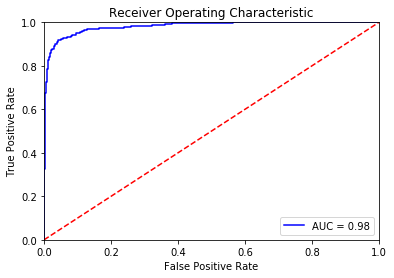

In [49]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(ytrain, log_predict_train[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

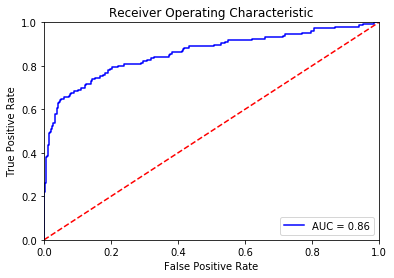

In [50]:
fpr, tpr, threshold = roc_curve(ytest, log_predict_test[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Что такое ядра в SVM?*

Посмотрим, улучшит ли качество применение SVM с ядром. Попробуйте использовать SVM с различными ядрами для данной задачи. 

Для каждого ядра подберите значение параметра C по кросс-валидации.

In [ ]:
#your code here